## Import necessary Libraries

In [198]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import string
import matplotlib.pyplot as plt

## Load the datasets

In [199]:
data1 = pd.read_csv("/content/drive/MyDrive/NLP PROJECT DATA SETS/Amazon Review/amazon_cells_labelled.txt", sep='\t', header=None)
data1.head()

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [200]:
data2 = pd.read_csv("/content/drive/MyDrive/NLP PROJECT DATA SETS/Amazon Review/imdb_labelled.txt", sep='\t', header=None)
data2.head()

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [201]:
data3= pd.read_csv("/content/drive/MyDrive/NLP PROJECT DATA SETS/Amazon Review/yelp_labelled.txt", sep='\t', header=None)
data3.head()

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


## Combining all datasets into single frame

In [202]:
dataset = data1.append([data2 , data3] , ignore_index=True) ## ignore_index  parameter is used to reset the row indices to default integers when combining or appending data, effectively ignoring the original row indices.


<ipython-input-202-135d6abb4fa9>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = data1.append([data2 , data3] , ignore_index=True) ## ignore_index  parameter is used to reset the row indices to default integers when combining or appending data, effectively ignoring the original row indices.


In [203]:
dataset.head()

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [204]:
dataset.shape

(2748, 2)

In [205]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2748 non-null   object
 1   1       2748 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 43.1+ KB


In [206]:
column_names = ['review' , 'label']

In [207]:
dataset.columns = column_names

In [208]:
dataset.head()

,review,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [209]:
dataset['Length'] = dataset['review'].apply(len)
dataset.head()

,review,label,Length
0,So there is no way for me to plug it in here i...,0,82
1,"Good case, Excellent value.",1,27
2,Great for the jawbone.,1,22
3,Tied to charger for conversations lasting more...,0,79
4,The mic is great.,1,17


In [210]:
# EDA

In [211]:
dataset.describe()

,label,Length
count,2748.000000,2748.000000
mean,0.504367,71.528384
std,0.500072,201.987266
min,0.000000,7.000000
25%,0.000000,32.000000
50%,1.000000,55.000000
75%,1.000000,87.000000
max,1.000000,7944.000000


In [212]:
dataset[dataset.Length==27]['review'].iloc[0]

'Good case, Excellent value.'

# Text PreProcessing

In [213]:
dataset.isnull().sum()

review    0
label     0
Length    0
dtype: int64

In [214]:
dataset.head()

,review,label,Length
0,So there is no way for me to plug it in here i...,0,82
1,"Good case, Excellent value.",1,27
2,Great for the jawbone.,1,22
3,Tied to charger for conversations lasting more...,0,79
4,The mic is great.,1,17


In [215]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [216]:
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    return text


In [217]:
text1 = 'Data!@science???!'
remove_punct(text1)

'Datascience'

In [218]:
dataset['text_clean'] = dataset['review'].apply(lambda x : remove_punct(x))

In [219]:
dataset.head()

,review,label,Length,text_clean
0,So there is no way for me to plug it in here i...,0,82,So there is no way for me to plug it in here i...
1,"Good case, Excellent value.",1,27,Good case Excellent value
2,Great for the jawbone.,1,22,Great for the jawbone
3,Tied to charger for conversations lasting more...,0,79,Tied to charger for conversations lasting more...
4,The mic is great.,1,17,The mic is great


In [220]:
from sklearn.feature_extraction.text import CountVectorizer

In [221]:
CV = CountVectorizer(stop_words = 'english')

## Model Selection

[Stopwords are the words in any language which does not add much meaning to a sentence. They are the words which are very common in text documents such as a, an, the, you, your, etc. The Stop Words highly appear in text documents. However, they are not being helpful for text analysis in many of the cases, So it is better to remove from the text. We can focus on the important words if stop words have removed.]

In [222]:
dataset.head()

,review,label,Length,text_clean
0,So there is no way for me to plug it in here i...,0,82,So there is no way for me to plug it in here i...
1,"Good case, Excellent value.",1,27,Good case Excellent value
2,Great for the jawbone.,1,22,Great for the jawbone
3,Tied to charger for conversations lasting more...,0,79,Tied to charger for conversations lasting more...
4,The mic is great.,1,17,The mic is great


In [223]:
xSet = dataset['text_clean'].values
ySet = dataset['label'].values

In [224]:
xSet

array(['So there is no way for me to plug it in here in the US unless I go by a converter',
       'Good case Excellent value', 'Great for the jawbone', ...,
       'Overall I was not impressed and would not go back',
       'The whole experience was underwhelming and I think well just go to Ninja Sushi next time',
       'Then as if I hadnt wasted enough of my life there they poured salt in the wound by drawing out the time it took to bring the check'],
      dtype=object)

In [225]:
ySet.dtype

dtype('int64')

## Data is divided into 75% is traning data and 25% is testing data

In [226]:
xSet_train, xSet_test, ySet_train, ySet_test = train_test_split(xSet, ySet, test_size=0.2, random_state=10)

In [227]:
xSet_train_CV = CV.fit_transform(xSet_train)

In [228]:
xSet_train_CV

<2198x4496 sparse matrix of type '<class 'numpy.int64'>'
	with 12840 stored elements in Compressed Sparse Row format>

In [229]:
xSet_train_CV.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Training the model

## MultinomialNB

In [230]:
from sklearn.naive_bayes import MultinomialNB
model1= MultinomialNB()
model1.fit(xSet_train_CV, ySet_train)

MultinomialNB()

In [231]:
xSet_test_CV = CV.transform(xSet_test)

In [232]:
xSet_test_CV

<550x4496 sparse matrix of type '<class 'numpy.int64'>'
	with 2374 stored elements in Compressed Sparse Row format>

In [233]:
predict1 = model1.predict(xSet_test_CV)
predict1

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,

In [234]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score
cm=confusion_matrix(ySet_test,predict1)
recall=recall_score(ySet_test,predict1,average='weighted')
precision=precision_score(ySet_test,predict1,average='weighted')
f1score=f1_score(ySet_test,predict1,average='weighted')
accuracy=accuracy_score(ySet_test,predict1)
print("CM:",cm)
print("Recall:",recall)
print("Precision:",precision)
print("F1 Score:",f1score)
print("Accuracy:",accuracy)

CM: [[204  75]
 [ 39 232]]
Recall: 0.7927272727272727
Precision: 0.7982127463560688
F1 Score: 0.7920347973229491
Accuracy: 0.7927272727272727


## GaussianNB


In [235]:
from sklearn.naive_bayes import GaussianNB

# Assuming xSet_train_CV is a sparse matrix and ySet_train is your target variable
xSet_train_CV_dense = xSet_train_CV.toarray()

model2 = GaussianNB()
model2.fit(xSet_train_CV_dense, ySet_train)


GaussianNB()

In [236]:
# Assuming xSet_test_CV is a sparse matrix
xSet_test_CV_dense = xSet_test_CV.toarray()

In [237]:
predict2 = model2.predict(xSet_test_CV_dense)
predict2



array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,

In [238]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score
cm=confusion_matrix(ySet_test,predict2)
recall=recall_score(ySet_test,predict2,average='weighted')
precision=precision_score(ySet_test,predict2,average='weighted')
f1score=f1_score(ySet_test,predict2,average='weighted')
accuracy=accuracy_score(ySet_test,predict2)
print("CM:",cm)
print("Recall:",recall)
print("Precision:",precision)
print("F1 Score:",f1score)
print("Accuracy:",accuracy)

CM: [[149 130]
 [ 49 222]]
Recall: 0.6745454545454546
Precision: 0.6924896694214876
F1 Score: 0.6680696788901157
Accuracy: 0.6745454545454546


## LogisticRegression

In [239]:
import sklearn
from sklearn import linear_model
log=sklearn.linear_model.LogisticRegression()
model3=log.fit(xSet_train_CV_dense, ySet_train)

In [240]:
predict3=model3.predict(xSet_test_CV_dense)
predict3

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,

In [241]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score
cm=confusion_matrix(ySet_test,predict3)
recall=recall_score(ySet_test,predict3,average='weighted')
precision=precision_score(ySet_test,predict3,average='weighted')
f1score=f1_score(ySet_test,predict3,average='weighted')
accuracy=accuracy_score(ySet_test,predict3)
print("CM:",cm)
print("Recall:",recall)
print("Precision:",precision)
print("F1 Score:",f1score)
print("Accuracy:",accuracy)

CM: [[226  53]
 [ 53 218]]
Recall: 0.8072727272727273
Precision: 0.8072727272727273
F1 Score: 0.8072727272727273
Accuracy: 0.8072727272727273


## DecisionTreeClassifier

In [242]:
from sklearn import tree
Dtree=sklearn.tree.DecisionTreeClassifier()
model4=Dtree.fit(xSet_train_CV_dense, ySet_train)

In [243]:
predict4=model4.predict(xSet_test_CV_dense)
predict4

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,

In [244]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score
cm=confusion_matrix(ySet_test,predict4)
recall=recall_score(ySet_test,predict4,average='weighted')
precision=precision_score(ySet_test,predict4,average='weighted')
f1score=f1_score(ySet_test,predict4,average='weighted')
accuracy=accuracy_score(ySet_test,predict4)
print("CM:",cm)
print("Recall:",recall)
print("Precision:",precision)
print("F1 Score:",f1score)
print("Accuracy:",accuracy)

CM: [[227  52]
 [ 83 188]]
Recall: 0.7545454545454545
Precision: 0.7574242424242424
F1 Score: 0.7535594902573994
Accuracy: 0.7545454545454545


## RandomForestClassifier

In [245]:
from sklearn import ensemble
Rand_forest=sklearn.ensemble.RandomForestClassifier()
model5=Rand_forest.fit(xSet_train_CV_dense, ySet_train)

In [246]:
predict5=model5.predict(xSet_test_CV_dense)
predict5

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,

In [247]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score
cm=confusion_matrix(ySet_test,predict5)
recall=recall_score(ySet_test,predict5,average='weighted')
precision=precision_score(ySet_test,predict5,average='weighted')
f1score=f1_score(ySet_test,predict5,average='weighted')
accuracy=accuracy_score(ySet_test,predict5)
print("CM:",cm)
print("Recall:",recall)
print("Precision:",precision)
print("F1 Score:",f1score)
print("Accuracy:",accuracy)

CM: [[235  44]
 [ 76 195]]
Recall: 0.7818181818181819
Precision: 0.7853249496403581
F1 Score: 0.7808900571014229
Accuracy: 0.7818181818181819


## GradientBoostingClassifie

In [248]:
import xgboost
GBM=sklearn.ensemble.GradientBoostingClassifier()
model6=GBM.fit(xSet_train_CV_dense, ySet_train)

In [249]:
predict6=model6.predict(xSet_test_CV_dense)
predict6

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [250]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score
cm=confusion_matrix(ySet_test,predict6)
recall=recall_score(ySet_test,predict6,average='weighted')
precision=precision_score(ySet_test,predict6,average='weighted')
f1score=f1_score(ySet_test,predict6,average='weighted')
accuracy=accuracy_score(ySet_test,predict6)
print("CM:",cm)
print("Recall:",recall)
print("Precision:",precision)
print("F1 Score:",f1score)
print("Accuracy:",accuracy)

CM: [[256  23]
 [116 155]]
Recall: 0.7472727272727273
Precision: 0.7781511746680286
F1 Score: 0.7391513608885547
Accuracy: 0.7472727272727273


In [251]:
import seaborn as sns


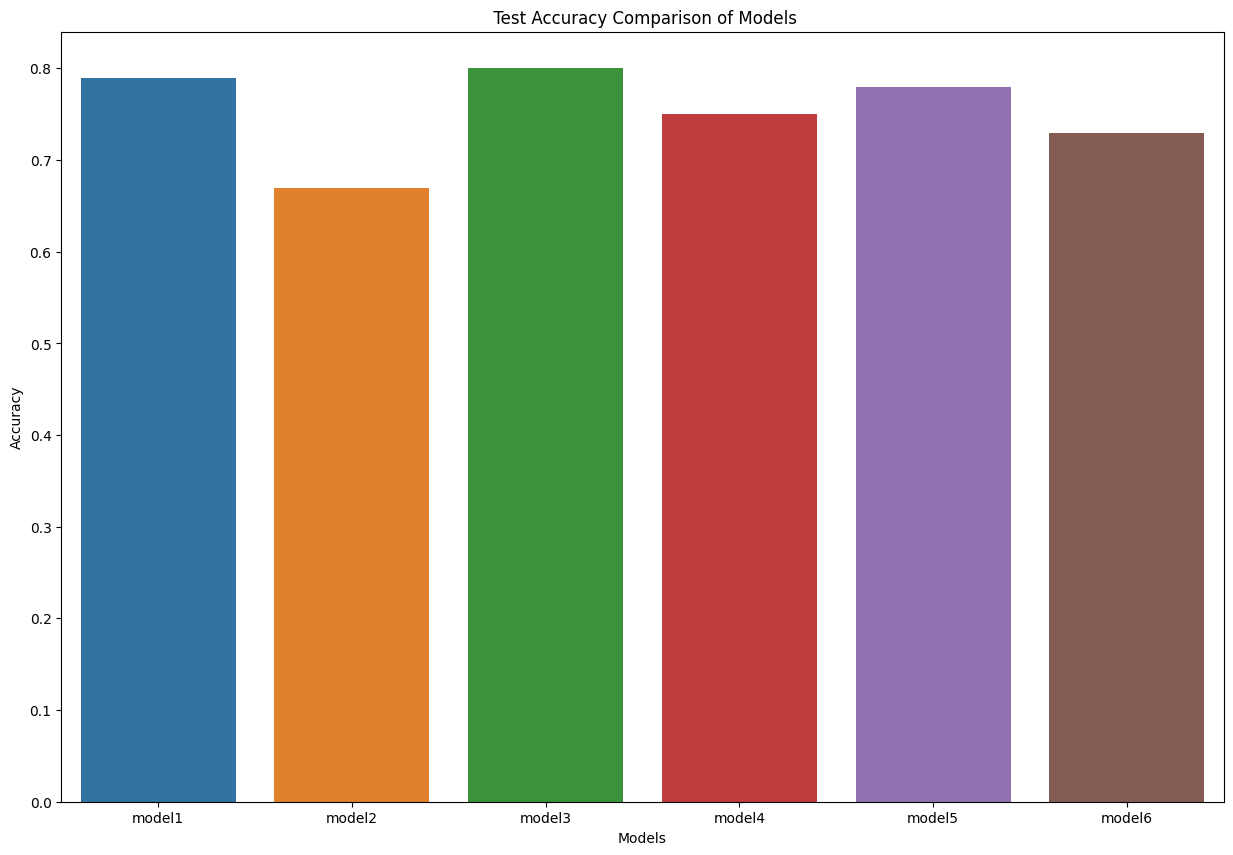

In [252]:
plt.figure(figsize=(15,10))
a=["model1","model2","model3","model4","model5","model6"]
b=[0.79,0.67,0.80,0.75,0.78,0.73]
sns.barplot(x=a,y=b)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title(' Test Accuracy Comparison of Models')
plt.show()

In [253]:
import pickle as pkl
pkl.dump(model3,open("amazon.pkl","wb"))
read=pkl.load(open("amazon.pkl","rb"))